In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data/021021_imu_air_tests/'

In [3]:
!ls {data_dir}

air_enclosure_011121-17-51_07
air_enclosure_long_test_021121-14-26_52
air_enclosure_long_test_021121-14-27_24
air_enclosure_proper_A_021121-12-02_35
air_enclosure_proper_A_021121-12-03_00
air_enclosure_proper_A_021121-12-03_30
air_enclosure_proper_A_021121-12-23_28
air_enclosure_proper_A_021121-12-23_48
air_enclosure_proper_A_021121-12-24_12
air_enclosure_slow_line_011121-18-22_14
air_enclosure_slow_triangle_011121-18-16_52
air_enclosure_triangle_011121-18-12_11


# Up - Down Motion

In [54]:
run = 'air_enclosure_011121-17-51_07'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

## Orien

Text(0.5, 0.98, 'Orientation (deg)')

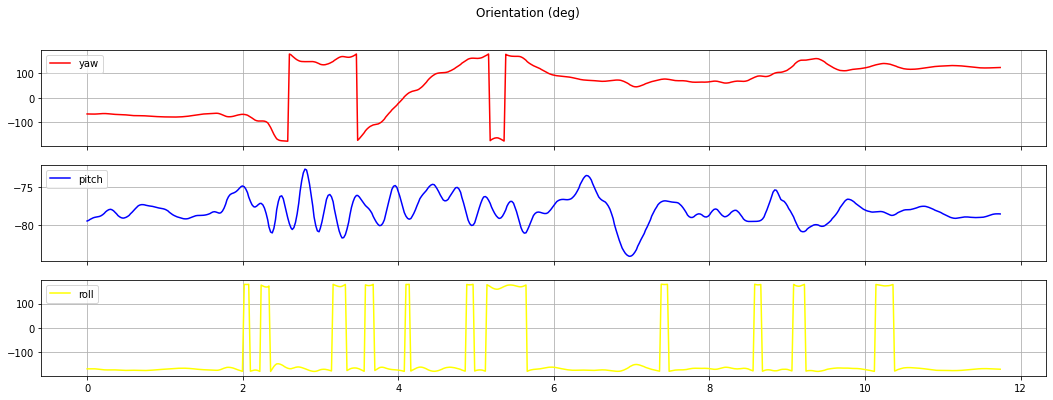

In [55]:
fig, ax = plt.subplots(3, figsize=(18, 6), sharex=True)
ax[0].plot(imu[:, 0], imu[:, 1], label='yaw', color='red')
ax[0].legend(loc='upper left')
ax[1].plot(imu[:, 0], imu[:, 2], color='blue', label='pitch')
ax[1].legend(loc='upper left')
ax[2].plot(imu[:, 0], imu[:, 3], color='yellow', label='roll')
ax[2].legend(loc='upper left')

for a in ax:
    a.grid()
fig.suptitle("Orientation (deg)")

## Median Bias 

In [56]:
t = imu[:,0]
acc = imu[:, 4:7] - np.percentile(imu[:, 4:7], 50, axis=0)
vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

In [57]:
with np.printoptions(suppress=True, precision=4, sign='+'):
    print(acc.mean(axis=0), np.percentile(acc, 50, axis=0), sep='\n')

[+0.0107 +0.0021 -0.0036]
[+0. +0. +0.]


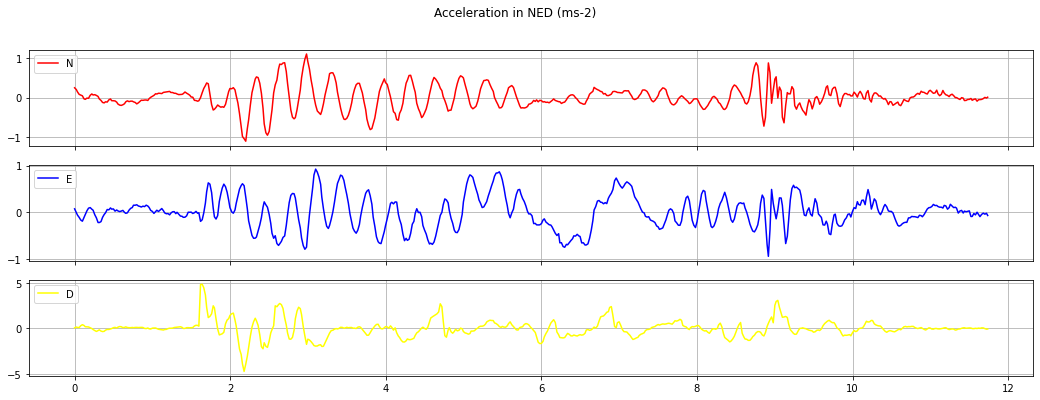

In [58]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

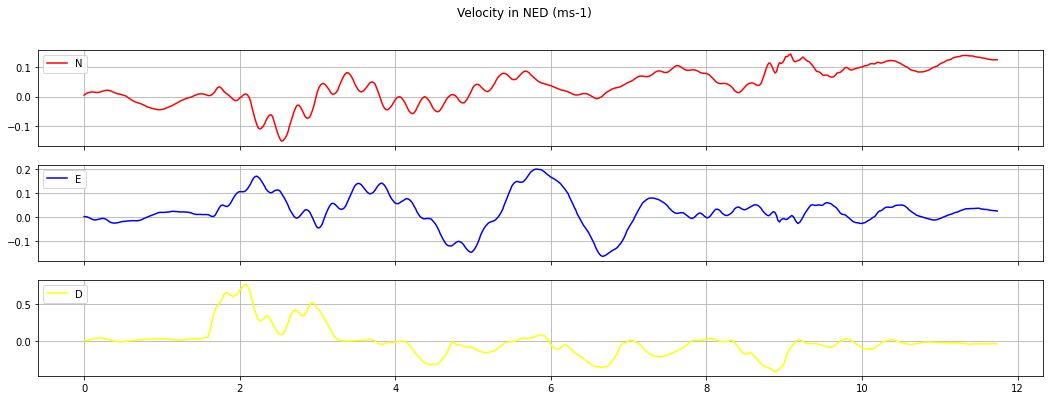

In [59]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      vel.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Velocity in NED (ms-1)");

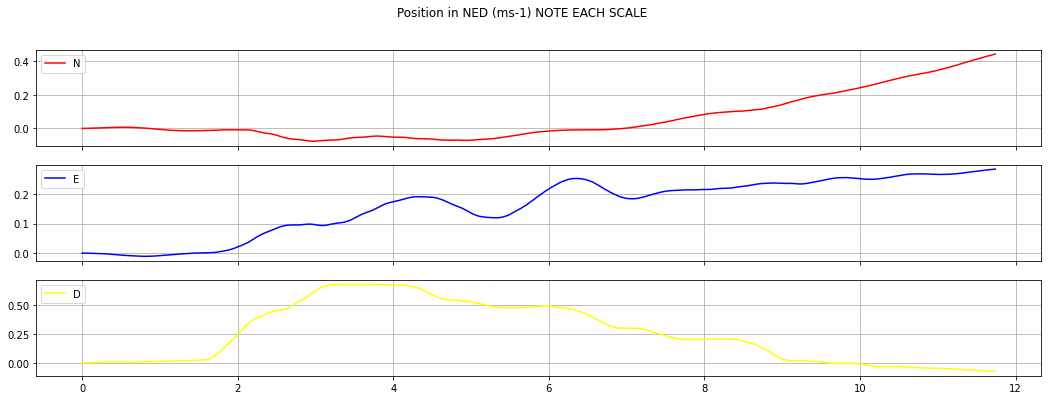

In [60]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      pos.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Position in NED (ms-1) NOTE EACH SCALE");

# Triangle

In [61]:
run = 'air_enclosure_triangle_011121-18-12_11'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

## Orien

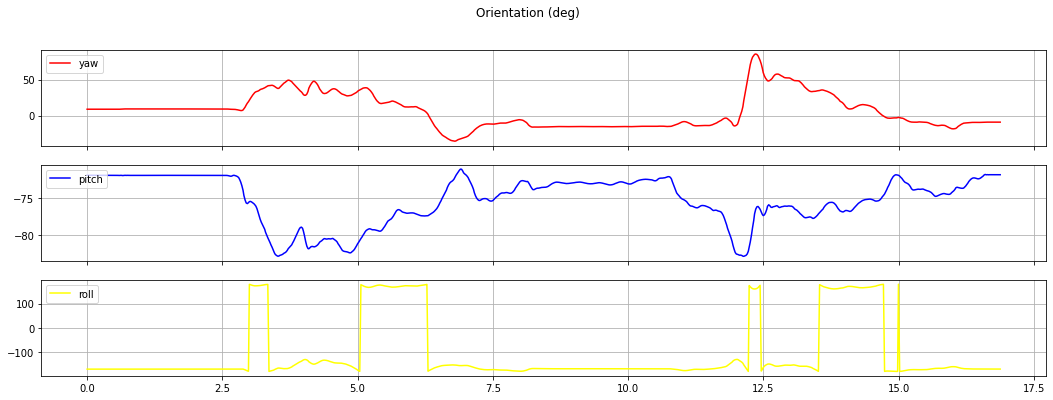

In [62]:
fig, ax = plt.subplots(3, figsize=(18,6), sharex=True)
ax[0].plot(imu[:,0], imu[:,1], label='yaw', color='red')
ax[0].legend(loc='upper left')
ax[1].plot(imu[:,0], imu[:,2], color='blue', label='pitch')
ax[1].legend(loc='upper left')
ax[2].plot(imu[:,0], imu[:,3], color='yellow', label='roll')
ax[2].legend(loc='upper left')

for a in ax:
    a.grid()
fig.suptitle("Orientation (deg)");

## Median Bias 

In [63]:
t = imu[:,0]
acc = imu[:, 4:7] - np.percentile(imu[:, 4:7], 50, axis=0)
vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

In [64]:
with np.printoptions(suppress=True, precision=4, sign='+'):
    print(acc.mean(axis=0), np.percentile(acc, 50, axis=0), sep='\n')

[-0.0003 -0.0067 +0.0086]
[+0. +0. +0.]


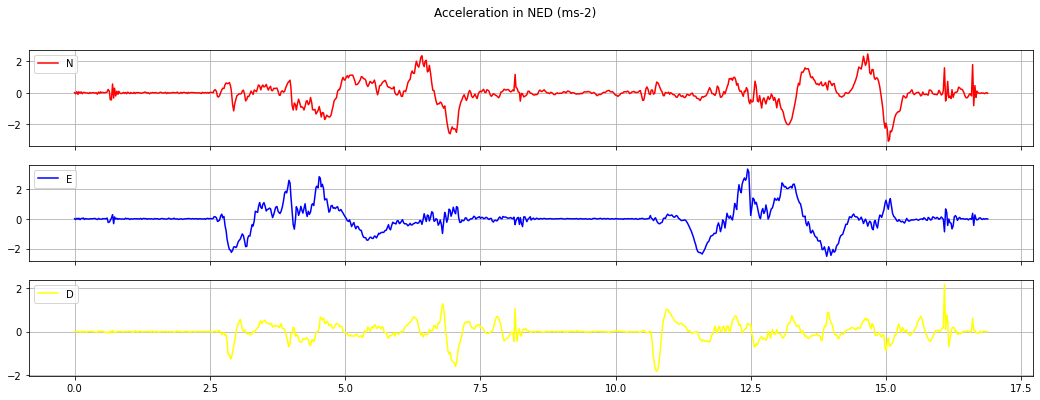

In [65]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

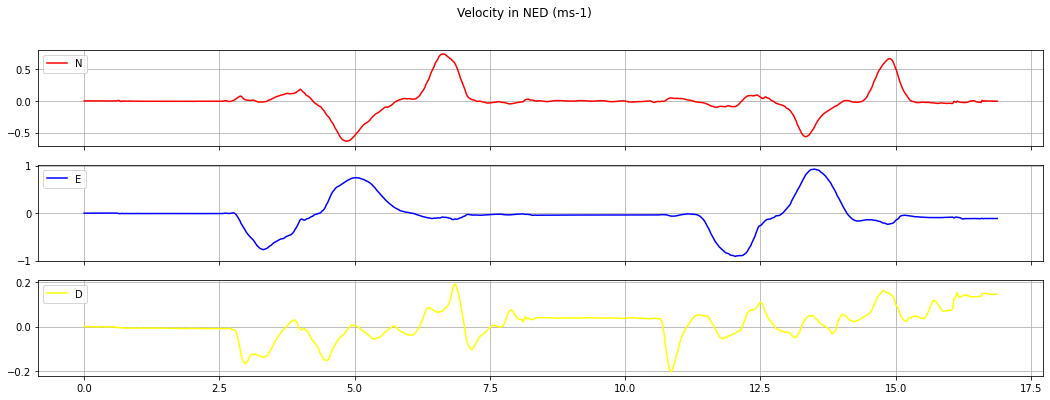

In [66]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      vel.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Velocity in NED (ms-1)");

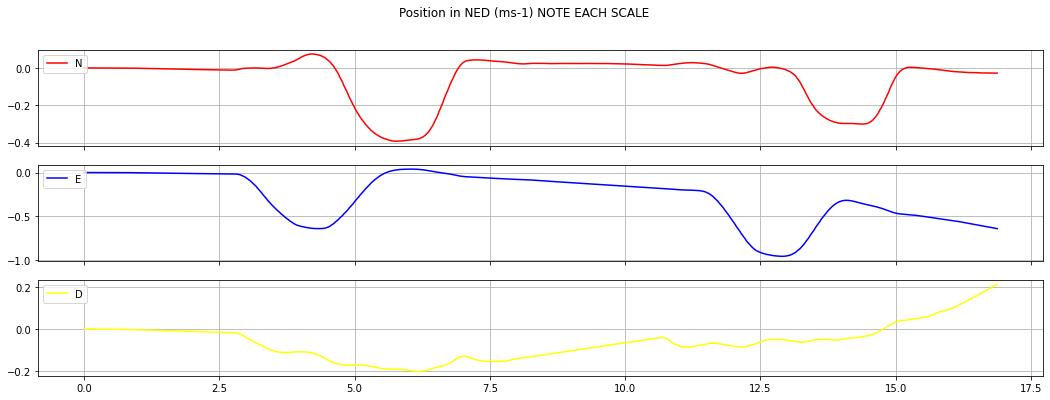

In [67]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      pos.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Position in NED (ms-1) NOTE EACH SCALE");

## XY


16.87911033630371


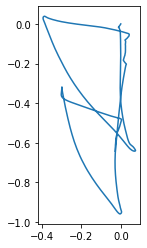

In [68]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)
print(t[-1])

# Slow Triangle

In [69]:
run = 'air_enclosure_slow_triangle_011121-18-16_52'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

## Orien

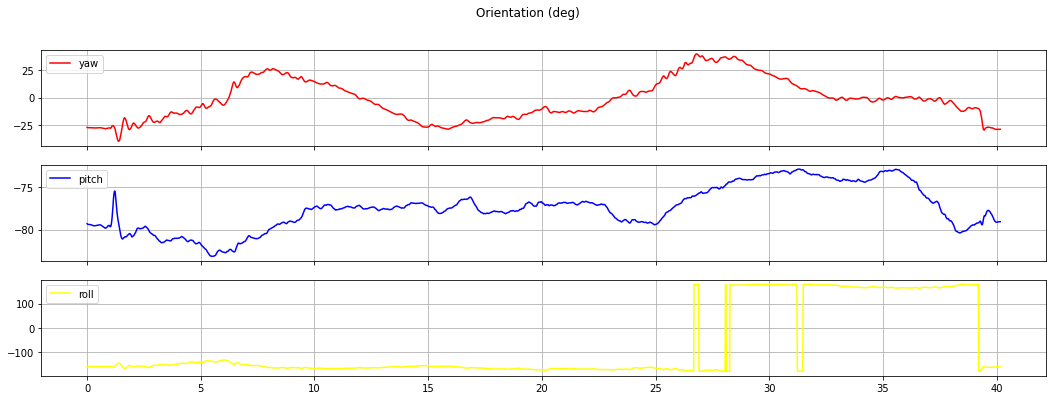

In [70]:
fig, ax = plt.subplots(3, figsize=(18,6), sharex=True)
ax[0].plot(imu[:,0], imu[:,1], label='yaw', color='red')
ax[0].legend(loc='upper left')
ax[1].plot(imu[:,0], imu[:,2], color='blue', label='pitch')
ax[1].legend(loc='upper left')
ax[2].plot(imu[:,0], imu[:,3], color='yellow', label='roll')
ax[2].legend(loc='upper left')

for a in ax:
    a.grid()
fig.suptitle("Orientation (deg)");

## Median Bias 

In [71]:
t = imu[:,0]
acc = imu[:, 4:7] - np.percentile(imu[:, 4:7], 50, axis=0)
vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

In [72]:
with np.printoptions(suppress=True, precision=4, sign='+'):
    print(acc.mean(axis=0), np.percentile(acc, 50, axis=0), sep='\n')

[-0.0062 -0.0034 +0.0005]
[+0. +0. +0.]


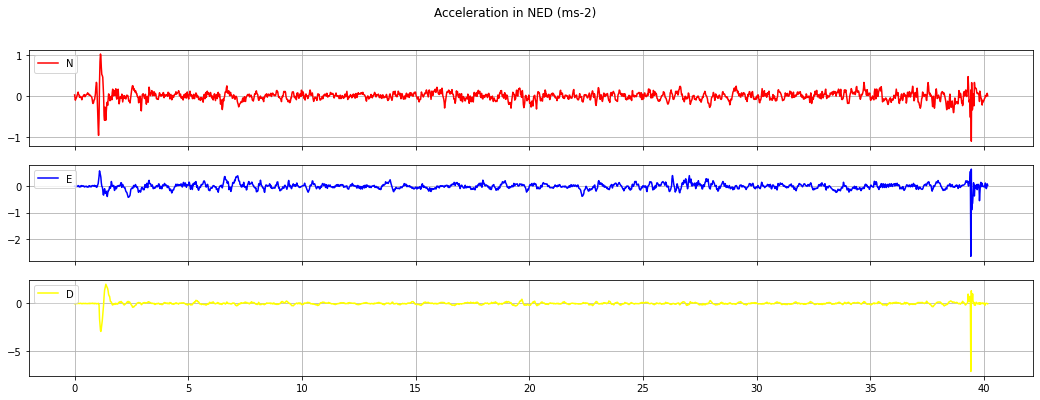

In [73]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

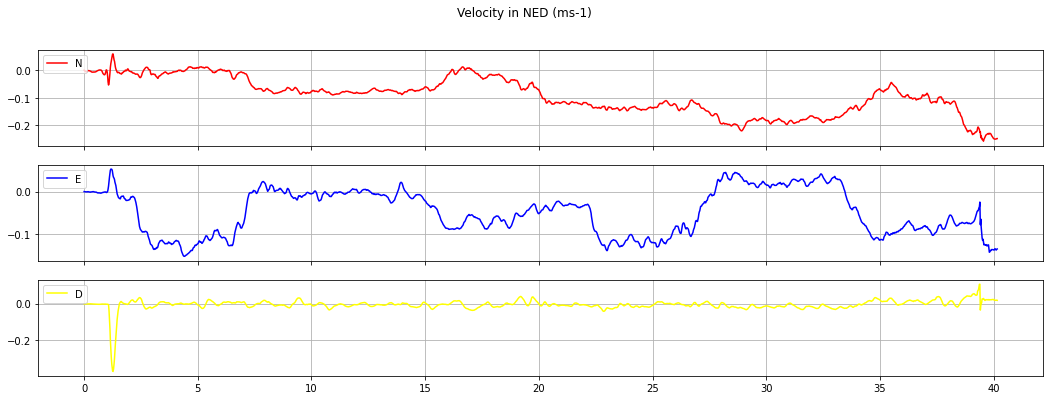

In [74]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      vel.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Velocity in NED (ms-1)");

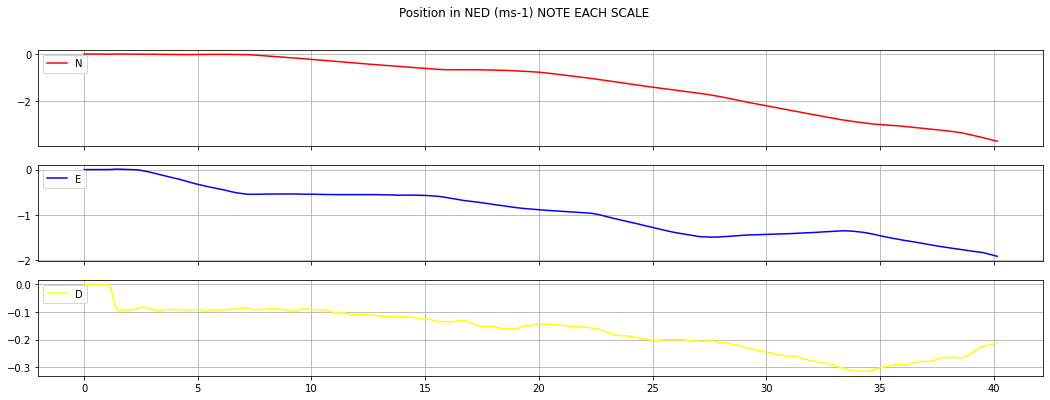

In [75]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      pos.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Position in NED (ms-1) NOTE EACH SCALE");

## XY

40.15871739387512


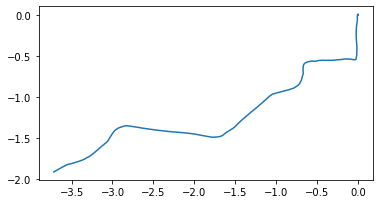

In [76]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)
print(t[-1])

17


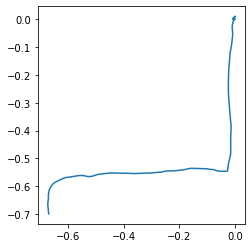

In [77]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:17*fs, 0:2].T)
print(17)

# Slow Line

In [101]:
run = 'air_enclosure_slow_line_011121-18-22_14'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

## Orien

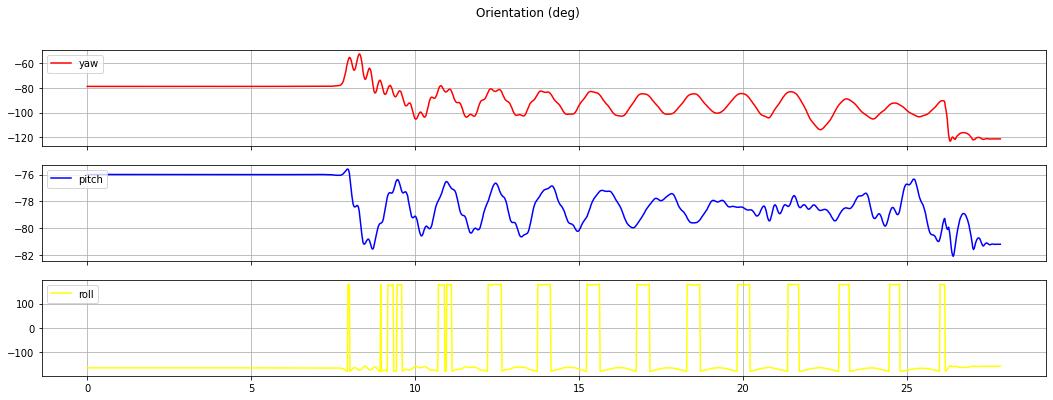

In [79]:
fig, ax = plt.subplots(3, figsize=(18,6), sharex=True)
ax[0].plot(imu[:,0], imu[:,1], label='yaw', color='red')
ax[0].legend(loc='upper left')
ax[1].plot(imu[:,0], imu[:,2], color='blue', label='pitch')
ax[1].legend(loc='upper left')
ax[2].plot(imu[:,0], imu[:,3], color='yellow', label='roll')
ax[2].legend(loc='upper left')

for a in ax:
    a.grid()
fig.suptitle("Orientation (deg)");

## Median Bias 

In [102]:
t = imu[:,0]
acc = imu[:, 4:7] - np.percentile(imu[:int(6*fs), 4:7], 50, axis=0)
vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

In [103]:
with np.printoptions(suppress=True, precision=4, sign='+'):
    print(acc.mean(axis=0), np.percentile(acc, 50, axis=0), sep='\n')

[+0.0022 +0.0017 +0.0001]
[-0.0005 -0.001  +0.001 ]


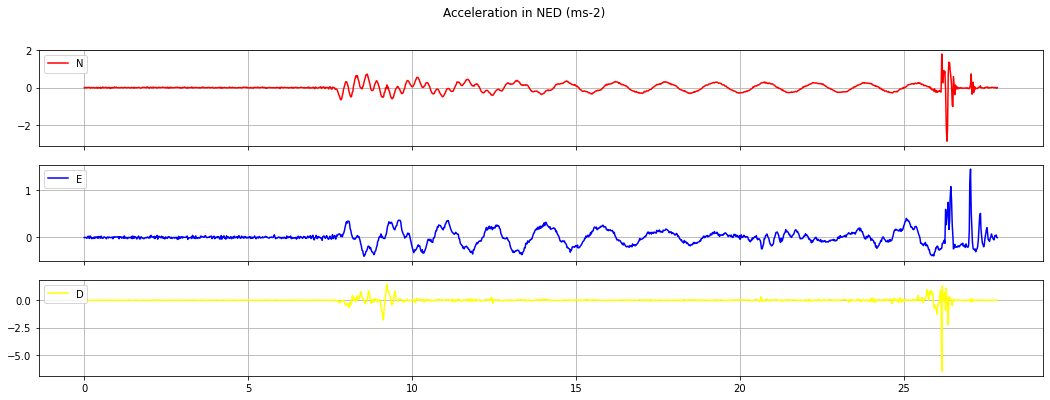

In [104]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

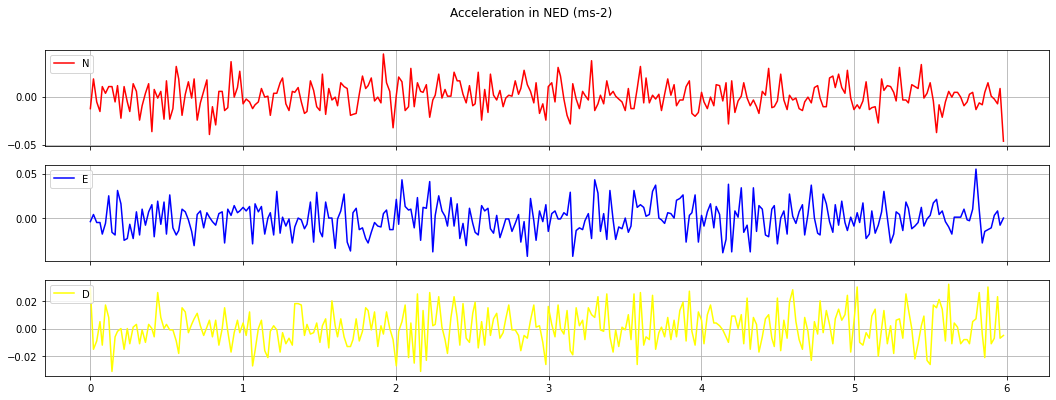

In [105]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc[:fs*6,...].T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t[:fs*6,...], y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

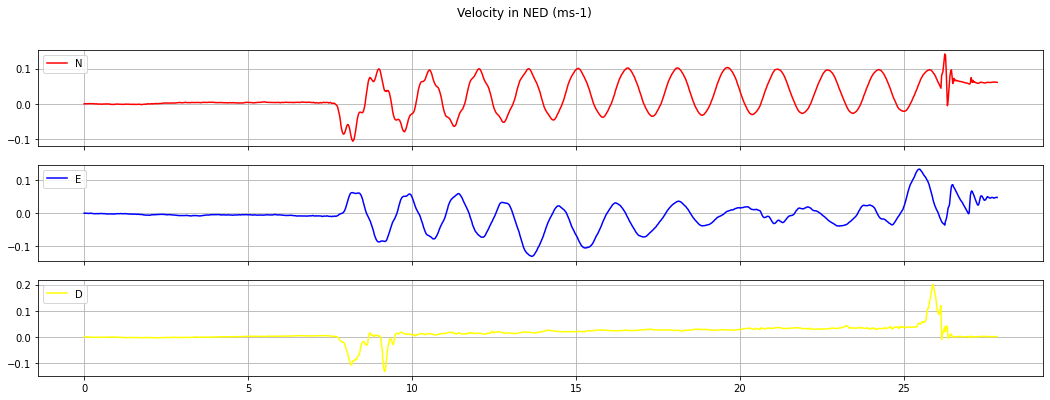

In [106]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      vel.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Velocity in NED (ms-1)");

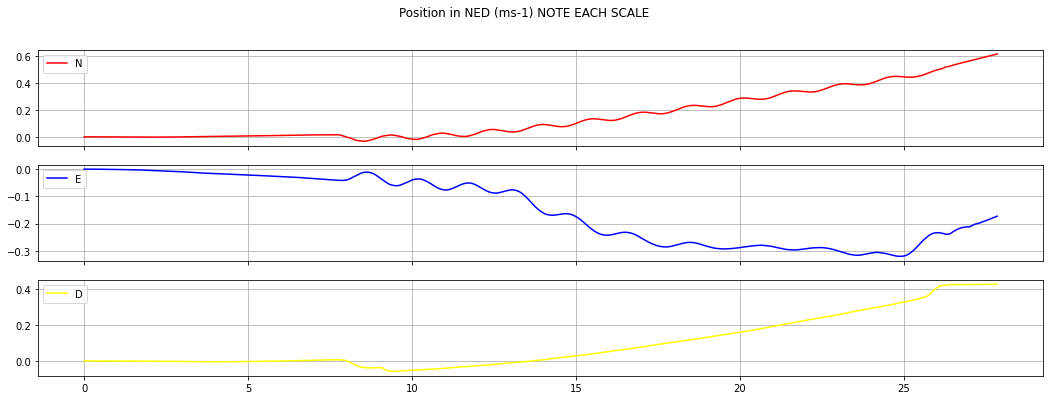

In [84]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      pos.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Position in NED (ms-1) NOTE EACH SCALE");

## XY

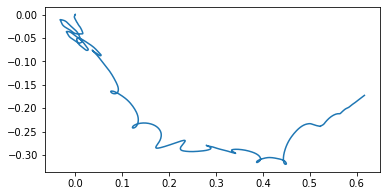

In [85]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)

## Smart Detrend 

In [86]:
from numpy.polynomial import Polynomial

In [87]:
def detrend(data, time=6, order=1):
    data = data.copy()
    if len(data.shape) == 1:
        data.reshape(-1, 1)
        
    # Data to Fit lines to
    x = t[:fs * time]
    ys = data[:fs * time, ...]
    polys = []
    for y in ys.T:
        polys.append(Polynomial.fit(x, y, order).convert().coef)
    polys = np.vstack(polys)

    # Remove linear trend
    for i, coeff in enumerate(polys.T):
        data[:, :] -= coeff[None, :] * t[:, None]**i
    return data

In [88]:
t = imu[:,0]
acc = detrend(imu[:, 4:7], order=1)
vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

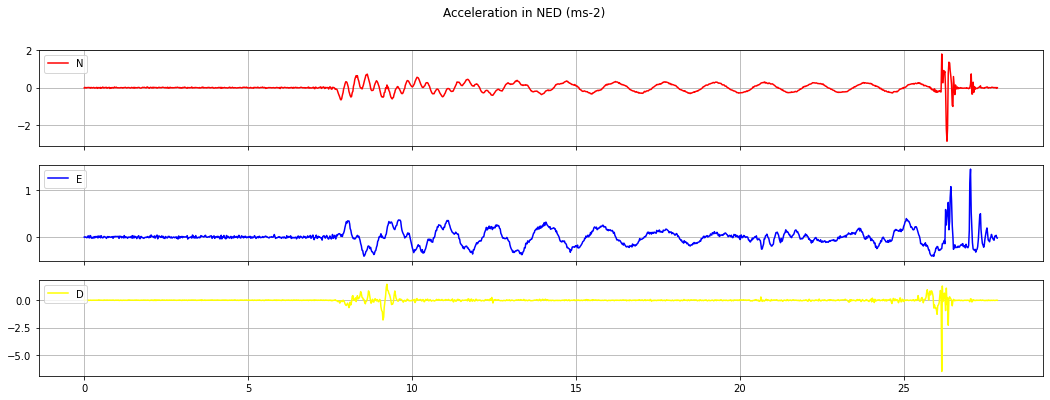

In [89]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

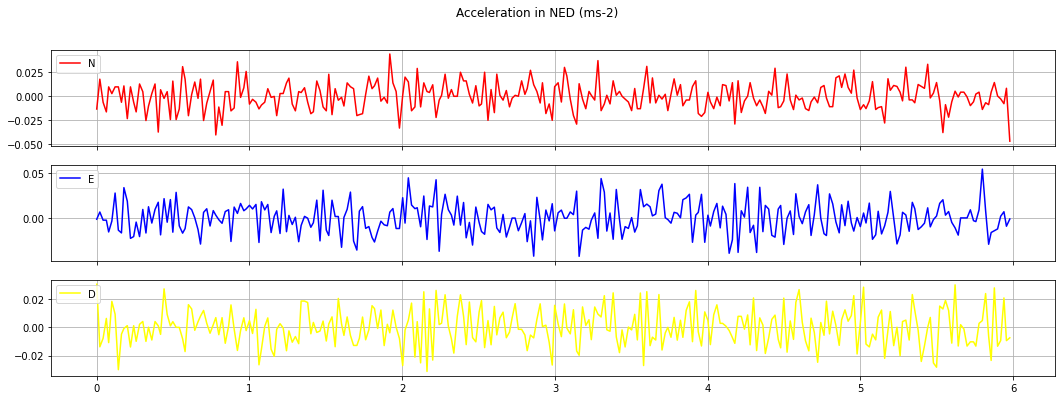

In [90]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      acc[:fs*6,...].T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t[:fs*6,...], y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Acceleration in NED (ms-2)");

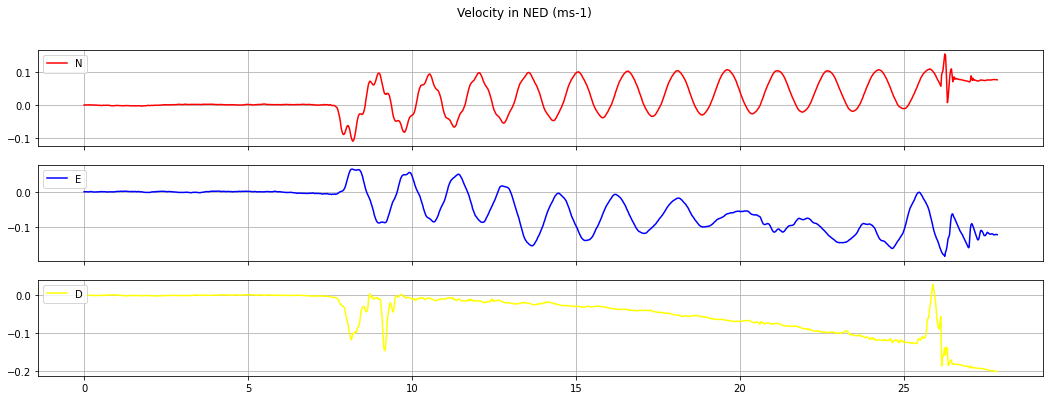

In [91]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      vel.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Velocity in NED (ms-1)");

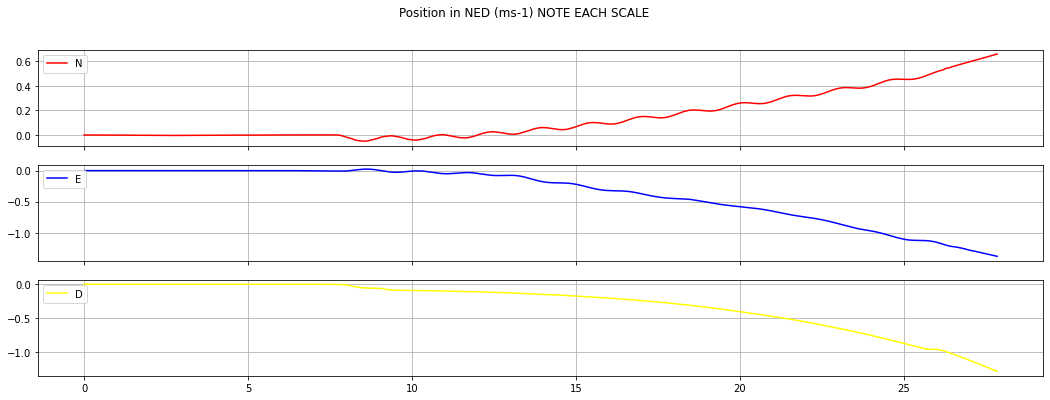

In [92]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      pos.T, 
                      'red blue yellow'.split(' '), 
                      'NED'):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Position in NED (ms-1) NOTE EACH SCALE");

## XY

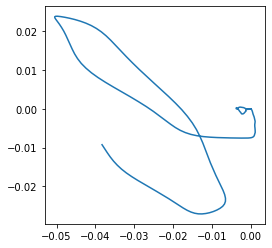

In [93]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:fs * 10, 0:2].T)

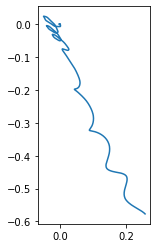

In [94]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:fs * 20, 0:2].T)

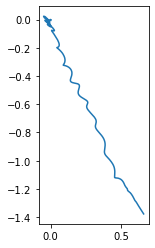

In [95]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:fs * 30, 0:2].T)

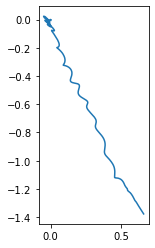

In [96]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:fs * 40, 0:2].T)

# Proper exp
A. 5 Seconds of Complete Rest  
B.   
    1. Triangle (fast)  
    2. 5 Seconds Rest and then Triangle (fast)  
    3. Triangle Slow  


In [256]:
t_rest = 4
xlim = (0, 25)
ylims = (
    (-1.2, 1.2),
    (-1.2, 1.2),
    (-1.2, 1.2)
)

In [257]:
run = 'air_enclosure_proper_A_021121-12-23_28'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

assert((np.diff(imu[:, 0]).mean()- dt) < 1e-5)

In [258]:
acc = imu[:, 4:7] - np.percentile(imu[:int(t_rest*fs), 4:7], 50, axis=0)
acc_new = np.resize(acc[:int(t_rest*fs), ...], (int(xlim[1] * fs), acc.shape[1]))
acc_new[0:acc.shape[0], ...] = acc
acc = acc_new

t = np.arange(int(xlim[1] * fs)) * dt

vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

Text(0.5, 0.98, 'Motion in NED')

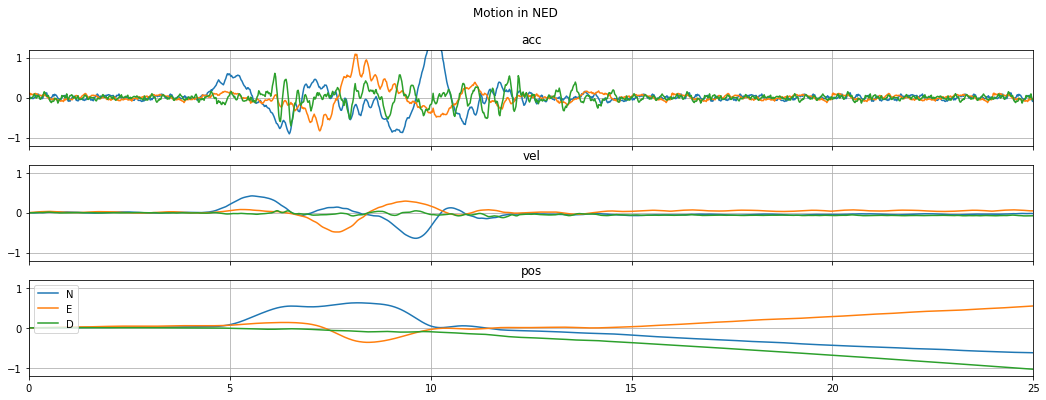

In [259]:
fig, axs = plt.subplots(3, figsize=(18, 6), sharex=True)

for ax, ys, l, ylim in zip(axs, (acc, vel, pos), 'acc vel pos'.split(' '),
                           ylims):
    ax.set_title(l)
    ax.plot(t, ys, label=list('NED'))
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.grid()
axs[-1].legend(loc='upper left')

fig.suptitle("Motion in NED")

Text(0.5, 1.0, 'Fast Test')

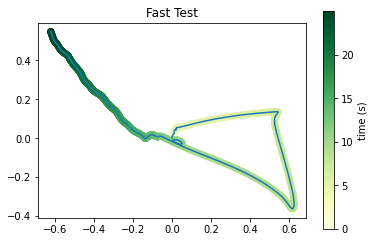

In [260]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)
plt.scatter(pos[:,0], pos[:, 1], c=t, cmap='YlGn')
plt.colorbar(label='time (s)')
plt.title('Fast Test')

In [261]:
run = 'air_enclosure_proper_A_021121-12-23_48'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

In [262]:
acc = imu[:, 4:7] - np.percentile(imu[:int(t_rest*fs), 4:7], 50, axis=0)
acc_new = np.resize(acc[:int(t_rest*fs), ...], (int(xlim[1] * fs), acc.shape[1]))
acc_new[0:acc.shape[0], ...] = acc
acc = acc_new

t = np.arange(int(xlim[1] * fs)) * dt

vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

Text(0.5, 0.98, 'Motion in NED')

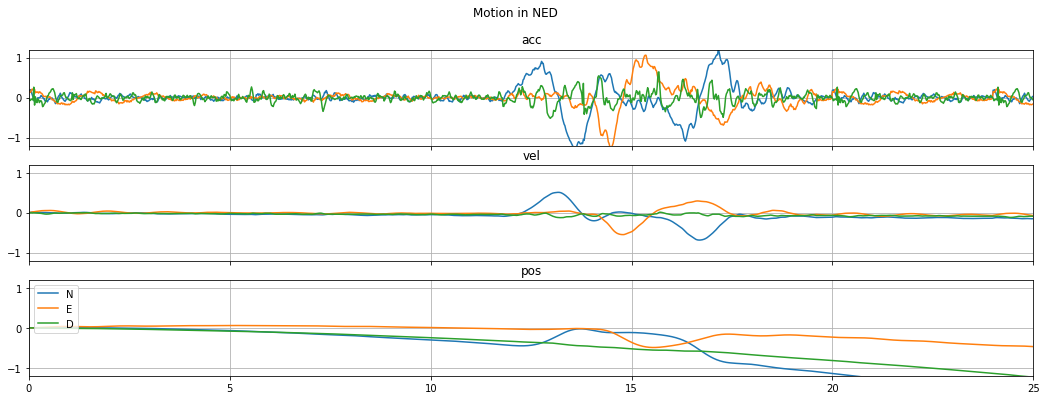

In [263]:
fig, axs = plt.subplots(3, figsize=(18, 6), sharex=True)

for ax, ys, l, ylim in zip(axs, (acc, vel, pos), 'acc vel pos'.split(' '),
                          ylims):
    ax.set_title(l)
    ax.plot(t, ys, label=list('NED'))
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.grid()
axs[-1].legend(loc='upper left')

fig.suptitle("Motion in NED")

Text(0.5, 1.0, 'Fast Test with Delay')

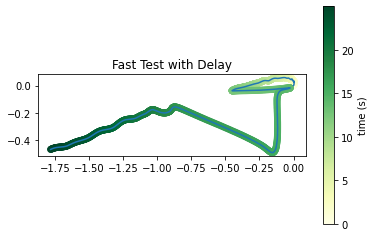

In [264]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)
plt.scatter(pos[:,0], pos[:, 1], c=t, cmap='YlGn')
plt.colorbar(label='time (s)')
plt.title('Fast Test with Delay')

In [276]:
run = 'air_enclosure_proper_A_021121-12-24_12'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

In [277]:
acc = imu[:, 4:7] - np.percentile(imu[:int(t_rest*fs), 4:7], 50, axis=0)
acc_new = np.resize(acc[:int(t_rest*fs), ...], (int(xlim[1] * fs), acc.shape[1]))
acc_new[0:acc.shape[0], ...] = acc
acc = acc_new

t = np.arange(int(xlim[1] * fs)) * dt

vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

Text(0.5, 0.98, 'Motion in NED')

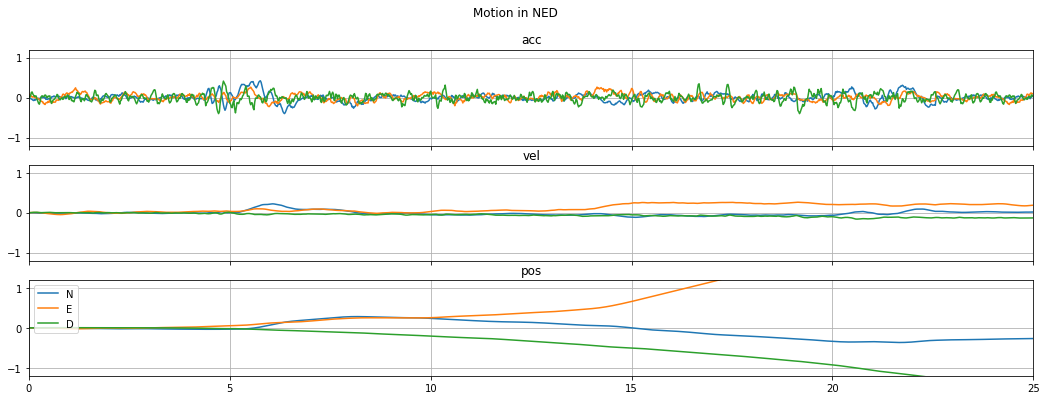

In [278]:
fig, axs = plt.subplots(3, figsize=(18, 6), sharex=True)

for ax, ys, l, ylim in zip(axs, (acc, vel, pos), 'acc vel pos'.split(' '),
                          ylims):
    ax.set_title(l)
    ax.plot(t, ys, label=list('NED'))
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.grid()
axs[-1].legend(loc='upper left')

fig.suptitle("Motion in NED")

Text(0.5, 1.0, 'Slowwww Test')

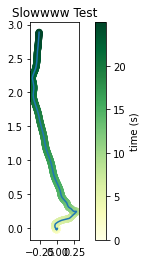

In [279]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)
plt.scatter(pos[:,0], pos[:, 1], c=t, cmap='YlGn')
plt.colorbar(label='time (s)')
plt.title('Slowwww Test')

Text(0.5, 1.0, 'Slowwww Test')

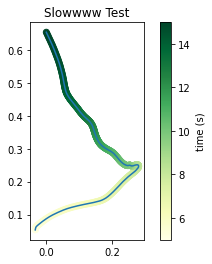

In [280]:
plt.gca().set_aspect('equal', 'box')
win = slice(int(fs * 5),int(fs * 15))
plt.plot(*pos[win, 0:2].T)
plt.scatter(pos[win,0], pos[win, 1], c=t[win], cmap='YlGn')
plt.colorbar(label='time (s)')
plt.title('Slowwww Test')

In [270]:
run = 'air_enclosure_proper_A_021121-12-24_12'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

In [271]:
acc = imu[:, 4:7] - np.percentile(imu[:, 4:7], 50, axis=0)
acc_new = np.resize(acc[:int(t_rest*fs), ...], (int(xlim[1] * fs), acc.shape[1]))
acc_new[0:acc.shape[0], ...] = acc
acc = acc_new

t = np.arange(int(xlim[1] * fs)) * dt

vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

Text(0.5, 0.98, 'Motion in NED')

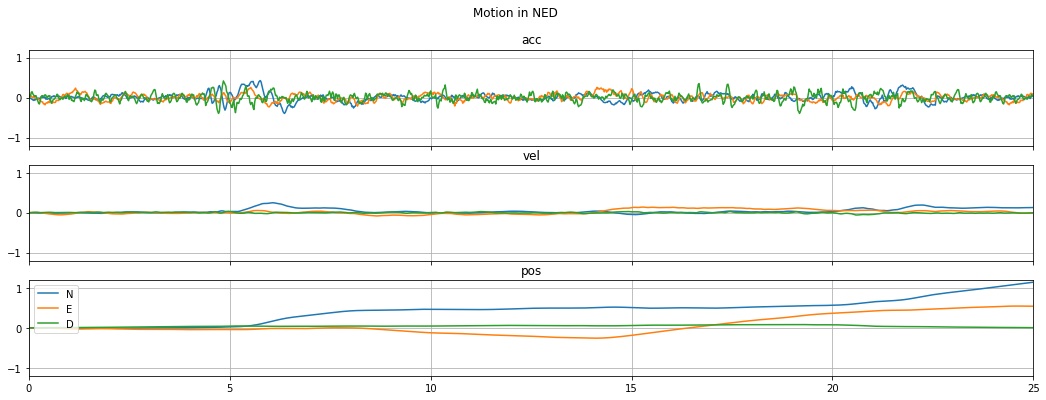

In [272]:
fig, axs = plt.subplots(3, figsize=(18, 6), sharex=True)

for ax, ys, l, ylim in zip(axs, (acc, vel, pos), 'acc vel pos'.split(' '),
                          ylims):
    ax.set_title(l)
    ax.plot(t, ys, label=list('NED'))
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.grid()
axs[-1].legend(loc='upper left')

fig.suptitle("Motion in NED")

Text(0.5, 1.0, 'Slowwww Test')

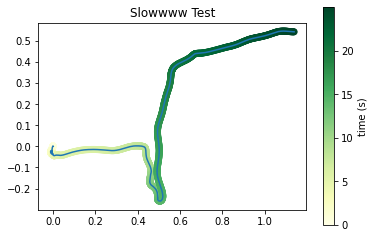

In [273]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T)
plt.scatter(pos[:,0], pos[:, 1], c=t, cmap='YlGn')
plt.colorbar(label='time (s)')
plt.title('Slowwww Test')

Text(0.5, 1.0, 'Slowwww Test')

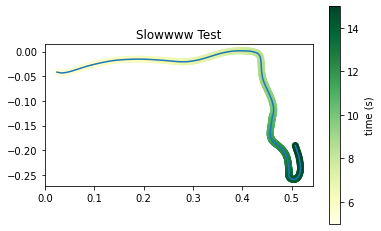

In [275]:
plt.gca().set_aspect('equal', 'box')
win = slice(int(fs * 5),int(fs * 15))
plt.plot(*pos[win, 0:2].T)
plt.scatter(pos[win,0], pos[win, 1], c=t[win], cmap='YlGn')
plt.colorbar(label='time (s)')
plt.title('Slowwww Test')

# Long Test

In [286]:
run = 'air_enclosure_long_test_021121-14-27_24'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

assert((np.diff(imu[:, 0]).mean()- dt) < 1e-5)

In [289]:
acc = imu[:, 4:7] - np.percentile(imu[:, 4:7], 50, axis=0)

t = np.arange(acc.shape[0]) * dt

vel = np.cumsum(acc, axis=0) * dt
pos = np.cumsum(vel, axis=0) * dt

Text(0.5, 0.98, 'Motion in NED')

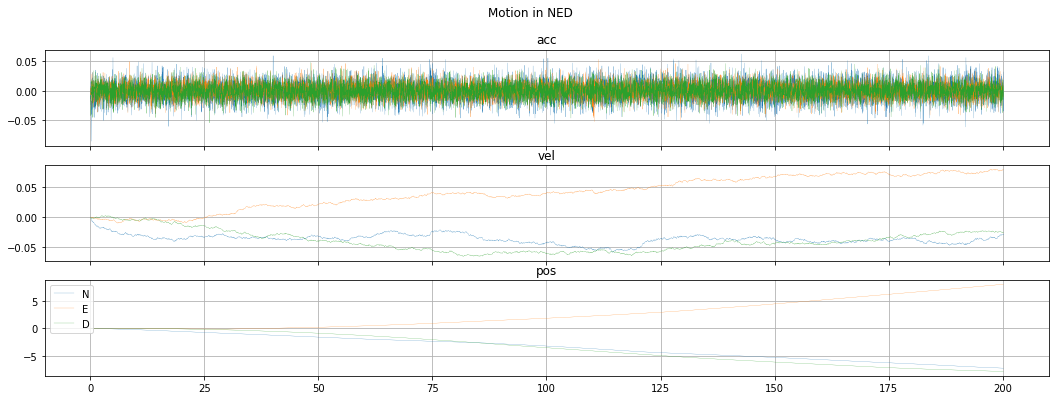

In [298]:
fig, axs = plt.subplots(3, figsize=(18, 6), sharex=True)

for ax, ys, l, ylim in zip(axs, (acc, vel, pos), 'acc vel pos'.split(' '),
                          ylims):
    ax.set_title(l)
    ax.plot(t, ys, label=list('NED'), alpha=1.0, linewidth=0.2)
#     ax.set_ylim(-0.1, 0.1)
    ax.grid()
axs[-1].legend(loc='upper left')

fig.suptitle("Motion in NED")

In [284]:
acc.std(axis=0)

array([0.10466445, 0.08506679, 0.10418876])

# Use ZUPT

## Load

In [4]:
run = 'air_enclosure_triangle_011121-18-12_11'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

In [5]:
t = imu[:,0]
orien = imu[:, 1:4] - np.percentile(imu[0:int(fs*2.5), 1:4], 50, axis=0)
acc = imu[:, 4:7] - np.percentile(imu[0:int(fs*2.5), 4:7], 50, axis=0)


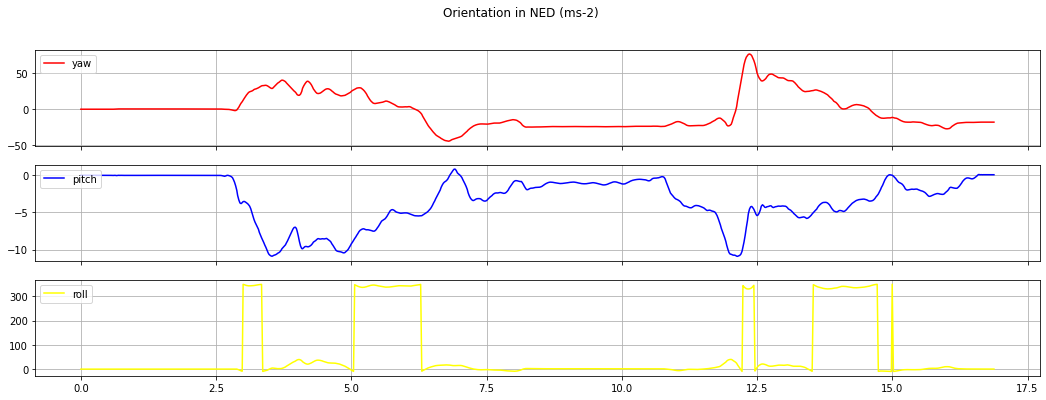

In [6]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      orien.T, 
                      'red blue yellow'.split(' '), 
                      'yaw_pitch_roll'.split('_')):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Orientation in NED (ms-2)");

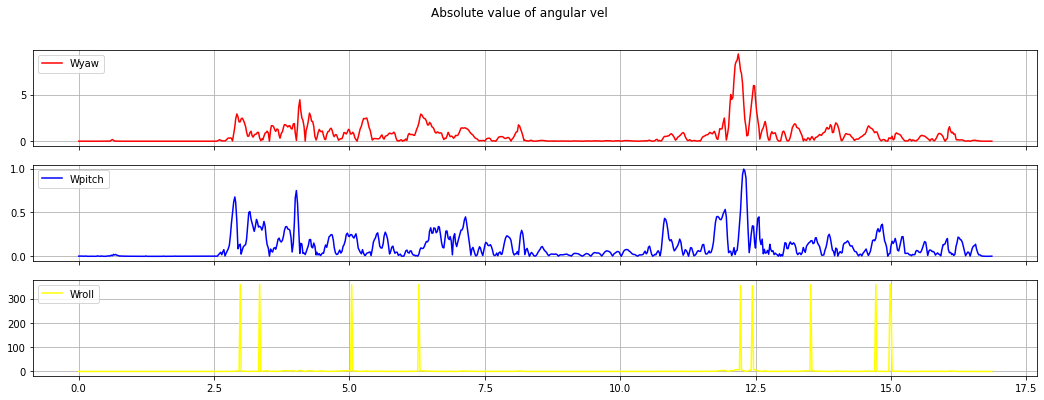

In [7]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      np.abs(np.diff(orien,axis=0)).T, 
                      'red blue yellow'.split(' '), 
                      'Wyaw_Wpitch_Wroll'.split('_')):
    a.plot(t[:-1], y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Absolute value of angular vel");

## ZUPT

### Helpers

In [8]:
import numpy as np

from scipy.signal import butter, lfilter, filtfilt, hilbert
class BP:
    def __init__(self, fs=1e6, low=30e3, high=50e3, order=5, preserve_phase=False):
        nyq = 0.5 * fs
        self.coeffs = butter(order, [low / nyq, high / nyq], btype='band')
        self.apply = filtfilt if preserve_phase else lfilter

    def __call__(self, data):
        return self.apply(*self.coeffs, data, axis=0)

class MA:
    def __init__(self, fs=1e6, dt=1e-3, apply_abs=True):
        self.n = int(fs * dt)
        self.kernel = np.ones((self.n,), dtype=np.int32) / self.n
        self.apply_abs = apply_abs

    def __call__(self, data):
        if self.apply_abs:
            if len(data.shape) == 1:
                return np.convolve(np.abs(data), self.kernel, mode='same')

            out = np.empty_like(data)
            for i in range(data.shape[1]):
                out[:, i] = np.convolve(np.abs(data[:, i]), self.kernel, mode='same')
            return out
        else:
            if len(data.shape) == 1:
                return np.convolve(data, self.kernel, mode='same')

            out = np.empty_like(data)
            for i in range(data.shape[1]):
                out[:, i] = np.convolve(data[:, i], self.kernel, mode='same')
            return out
            

class Hilbert:
    def __init__(self, fs=1e6):
        pass

    def __call__(self, data):
        return np.abs(hilbert(data))

### Main

In [9]:
w_env = MA(fs=fs, dt=0.4)(np.abs(np.diff(orien,axis=0)))

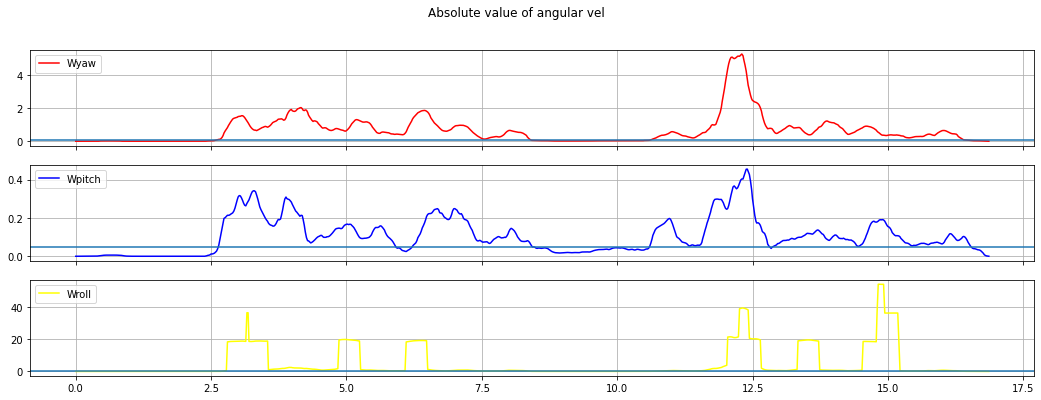

In [10]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      w_env.T, 
                      'red blue yellow'.split(' '), 
                      'Wyaw_Wpitch_Wroll'.split('_')):
    a.plot(t[:-1], y, color=c, label=l)
    a.axhline(0.05)
    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Absolute value of angular vel");

In [11]:
in_motion = w_env[:, :2] >= 0.05

vel = np.cumsum(acc, axis=0) * dt
vel_p = []
for v, motion in zip(vel.T, in_motion.T):
    all_indices = np.where(np.diff(motion))[0]
    all_indices = all_indices[:len(all_indices) - (len(all_indices)%2)]
    all_indices = np.insert(all_indices, 0, 0)
    all_indices = np.insert(all_indices, all_indices.shape[0], motion.shape[0])
    
    vel_cor = v.copy().reshape(-1,1)
    indices = all_indices
    zero_state = True
    zero_vel = vel_cor[indices[0]:indices[1]].mean(axis=0)
    for i in range(len(indices) - 1):
        if zero_state:
            # vel_cor[indices[i]:indices[i+1]] -= zero_vel
            vel_cor[indices[i]:indices[i+1]] = 0
            vel_cor[indices[i+1]:] -= zero_vel
        else:
            zero_vel = vel_cor[indices[i+1]:indices[i+2]].mean(axis=0)
            vel_cor[indices[i]:indices[i+1]] -= vel_cor[indices[i]+1]
            vel_cor[indices[i]:indices[i+1]] -= (vel_cor[indices[i+1]-1] * np.linspace(0, 1, indices[i+1] - indices[i])[:, None])
        zero_state = not zero_state
    vel_p.append(vel_cor.reshape(-1))
    print(vel_p[0].shape)
    
vel_p = np.stack(vel_p).T

(845,)
(845,)


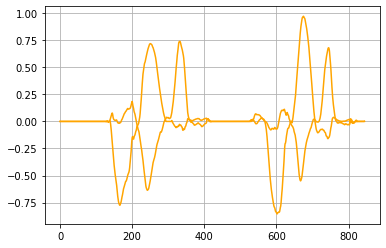

In [26]:
plt.plot(vel_p, color='orange')
plt.grid()

Text(0.5, 1.0, 'Velocity')

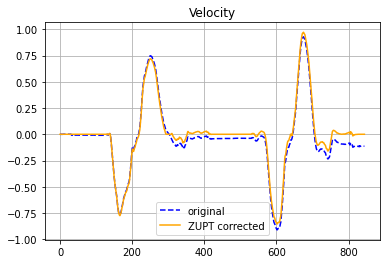

In [39]:
plt.plot(vel[:, 1], '--', color='blue', label='original')
plt.plot(vel_p[:, 1], color='orange', label='ZUPT corrected')
plt.grid()
plt.legend()
plt.title('Velocity')

## Plots

In [14]:
pos = np.cumsum(vel, axis=0) * dt
pos_p = np.cumsum(vel_p, axis=0) * dt

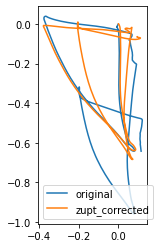

In [15]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T, label="original")
plt.plot(*pos_p[:, 0:2].T, label="zupt_corrected")
plt.legend()

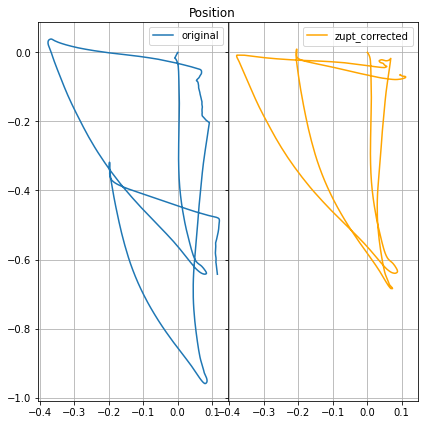

In [31]:
f, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6,6))
for ax in axs:
    ax.set_aspect('equal', 'box')
    ax.grid()
axs[0].plot(*pos[:, 0:2].T, label="original")
axs[1].plot(*pos_p[:, 0:2].T, label="zupt_corrected", color='orange')
axs[0].legend()
axs[1].legend()
f.tight_layout()
f.suptitle('Position')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)

# Use ZUPT

## Load

In [40]:
run = 'air_enclosure_proper_A_021121-12-23_48'

imu_orig = np.loadtxt(f'{data_dir}{run}/imu.csv', delimiter=',', skiprows=1)
t0 = imu_orig[0, 0]
imu_orig[:, 0] -= t0

imu = imu_orig[...]
imu.flags.writeable = False

fs = 50
dt = 1.0 / fs

In [41]:
t = imu[:,0]
orien = imu[:, 1:4] - np.percentile(imu[0:int(fs*2.5), 1:4], 50, axis=0)
acc = imu[:, 4:7] - np.percentile(imu[0:int(fs*2.5), 4:7], 50, axis=0)


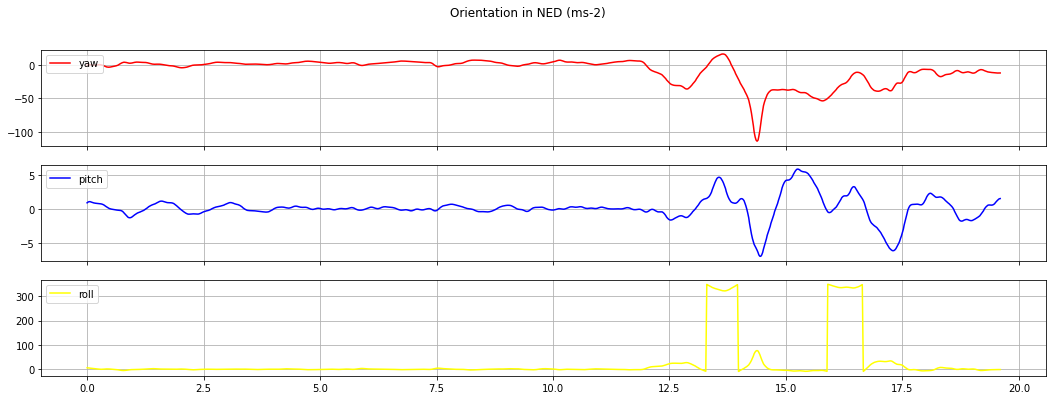

In [42]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      orien.T, 
                      'red blue yellow'.split(' '), 
                      'yaw_pitch_roll'.split('_')):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Orientation in NED (ms-2)");

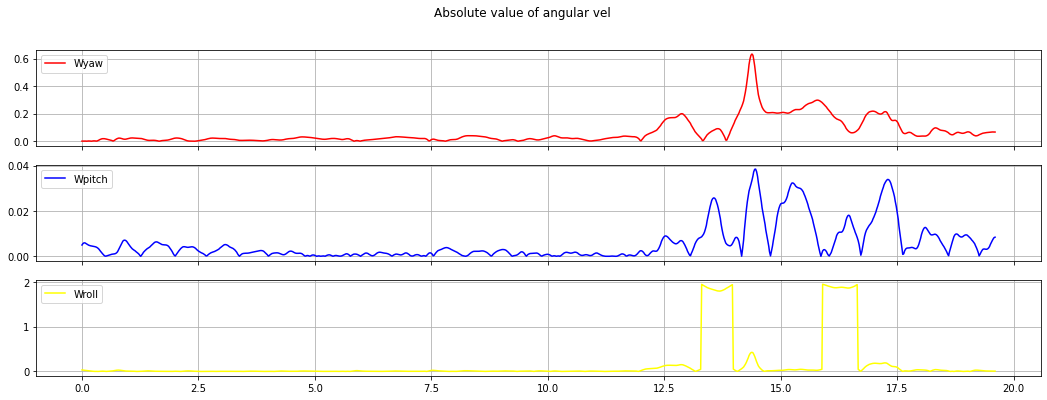

In [43]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      np.abs((orien / 180)).T, 
                      'red blue yellow'.split(' '), 
                      'Wyaw_Wpitch_Wroll'.split('_')):
    a.plot(t, y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Absolute value of angular vel");

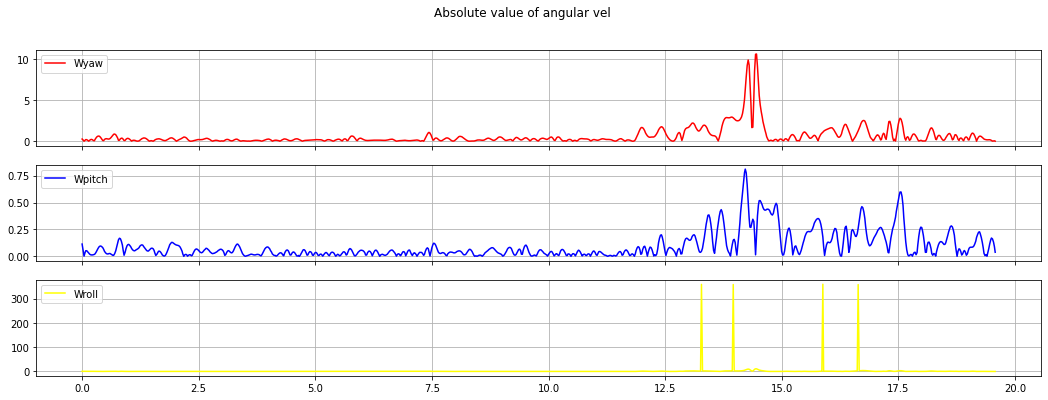

In [44]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      np.abs(np.diff(orien,axis=0)).T, 
                      'red blue yellow'.split(' '), 
                      'Wyaw_Wpitch_Wroll'.split('_')):
    a.plot(t[:-1], y, color=c, label=l)

    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Absolute value of angular vel");

## ZUPT

### Helpers

In [45]:
import numpy as np

from scipy.signal import butter, lfilter, filtfilt, hilbert
class BP:
    def __init__(self, fs=1e6, low=30e3, high=50e3, order=5, preserve_phase=False):
        nyq = 0.5 * fs
        self.coeffs = butter(order, [low / nyq, high / nyq], btype='band')
        self.apply = filtfilt if preserve_phase else lfilter

    def __call__(self, data):
        return self.apply(*self.coeffs, data, axis=0)

class MA:
    def __init__(self, fs=1e6, dt=1e-3, apply_abs=True):
        self.n = int(fs * dt)
        self.kernel = np.ones((self.n,), dtype=np.int32) / self.n
        self.apply_abs = apply_abs

    def __call__(self, data):
        if self.apply_abs:
            if len(data.shape) == 1:
                return np.convolve(np.abs(data), self.kernel, mode='same')

            out = np.empty_like(data)
            for i in range(data.shape[1]):
                out[:, i] = np.convolve(np.abs(data[:, i]), self.kernel, mode='same')
            return out
        else:
            if len(data.shape) == 1:
                return np.convolve(data, self.kernel, mode='same')

            out = np.empty_like(data)
            for i in range(data.shape[1]):
                out[:, i] = np.convolve(data[:, i], self.kernel, mode='same')
            return out
            

class Hilbert:
    def __init__(self, fs=1e6):
        pass

    def __call__(self, data):
        return np.abs(hilbert(data))

### Main

In [46]:
w_env = MA(fs=fs, dt=0.4)(np.abs(np.diff(orien,axis=0)))

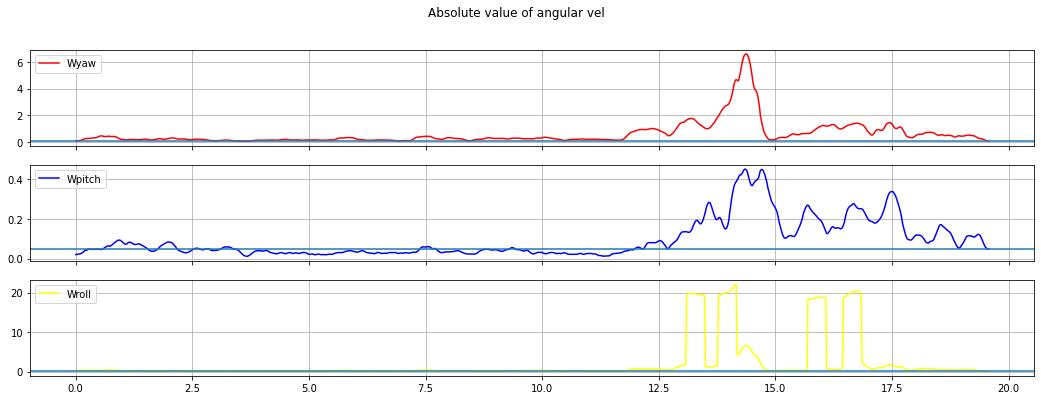

In [47]:
fig, axs = plt.subplots(3, figsize=(18,6), sharex=True)

for a, y, c, l in zip(axs, 
                      w_env.T, 
                      'red blue yellow'.split(' '), 
                      'Wyaw_Wpitch_Wroll'.split('_')):
    a.plot(t[:-1], y, color=c, label=l)
    a.axhline(0.05)
    a.legend(loc='upper left')
    a.grid()

fig.suptitle("Absolute value of angular vel");

In [48]:
in_motion = w_env[:, :2] >= 0.1

vel = np.cumsum(acc, axis=0) * dt
vel_p = []
for v, motion in zip(vel.T, in_motion.T):
    all_indices = np.where(np.diff(motion))[0]
    all_indices = all_indices[:len(all_indices) - (len(all_indices)%2)]
    all_indices = np.insert(all_indices, 0, 0)
    all_indices = np.insert(all_indices, all_indices.shape[0], motion.shape[0])
    
    vel_cor = v.copy().reshape(-1,1)
    indices = all_indices
    zero_state = True
    zero_vel = vel_cor[indices[0]:indices[1]].mean(axis=0)
    for i in range(len(indices) - 1):
        if zero_state:
            # vel_cor[indices[i]:indices[i+1]] -= zero_vel
            vel_cor[indices[i]:indices[i+1]] = 0
            vel_cor[indices[i+1]:] -= zero_vel
        else:
            zero_vel = vel_cor[indices[i+1]:indices[i+2]].mean(axis=0)
            vel_cor[indices[i]:indices[i+1]] -= vel_cor[indices[i]+1]
            vel_cor[indices[i]:indices[i+1]] -= (vel_cor[indices[i+1]-1] * np.linspace(0, 1, indices[i+1] - indices[i])[:, None])
        zero_state = not zero_state
    vel_p.append(vel_cor.reshape(-1))
    print(vel_p[0].shape)
    
vel_p = np.stack(vel_p).T

(981,)
(981,)


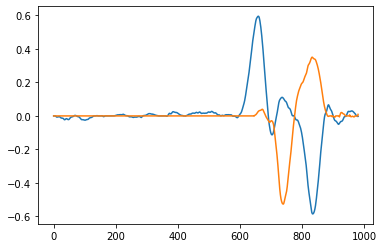

In [49]:
plt.plot(vel_p)

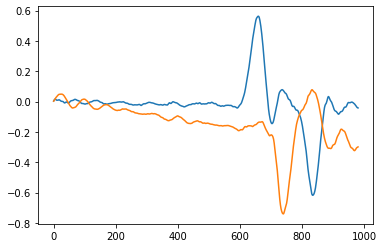

In [50]:
plt.plot(vel[:, :2])

Text(0.5, 0, 't (s)')

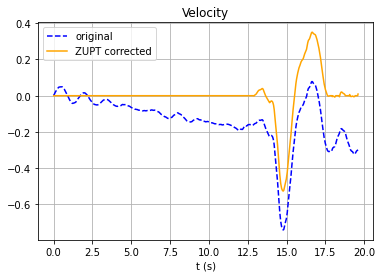

In [53]:
plt.plot(imu[:, 0], vel[:, 1], '--', color='blue', label='original')
plt.plot(imu[:, 0], vel_p[:, 1], color='orange', label='ZUPT corrected')
plt.grid()
plt.legend()
plt.title('Velocity')
plt.xlabel('t (s)')

## Plots

In [55]:
pos = np.cumsum(vel, axis=0) * dt
pos_p = np.cumsum(vel_p, axis=0) * dt

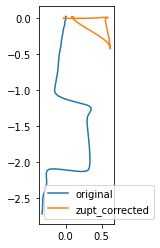

In [56]:
plt.gca().set_aspect('equal', 'box')
plt.plot(*pos[:, 0:2].T, label="original")
plt.plot(*pos_p[:, 0:2].T, label="zupt_corrected")
plt.legend()

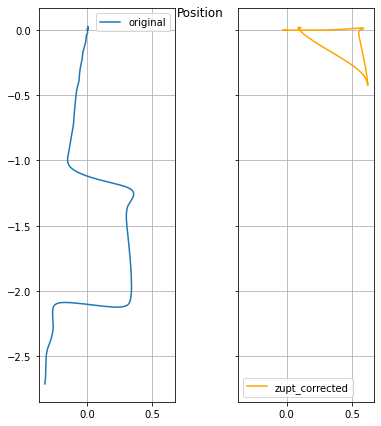

In [57]:
f, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6,6))
for ax in axs:
    ax.set_aspect('equal', 'box')
    ax.grid()
axs[0].plot(*pos[:, 0:2].T, label="original")
axs[1].plot(*pos_p[:, 0:2].T, label="zupt_corrected", color='orange')
axs[0].legend()
axs[1].legend()
f.tight_layout()
f.suptitle('Position')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)